# Examen 1 : Cours A59 Apprentissage par renforcement
<br>
Nous allons lors de cet examen tester l'utilisation de Monte Carlo avec l'environnement CliffWalking.<br>
L'objectif sera d'appliquer Monte Carlo first visit et de vérifier que l'algorithme est capable de résoudre le problème.<br>
<br>
Consignes:<br>

Vous devrez compléter le code la ou est présente la mention __# votre code__ <br>
Vous pouvez choisir d'implémenter différemment l'algortihme tant que vous utilisez Monte Carlo.<br>

Vous devrez également répondre aux questions là ou vous trouverez la mention __# votre réponse__<br>
<br>
## Bonne chance !

# Chargement des librairies

In [7]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict
import time

# Environnement

In [8]:
NUM_ITERATION = 5000
NUM_STEP=1000

## Cliffwalking

Le détail de l'environnement est accessible ici : https://gymnasium.farama.org/environments/toy_text/cliff_walking/

In [9]:
env = gym.make('CliffWalking-v0', render_mode="ansi") 
env_test = gym.make('CliffWalking-v0', render_mode="human") # ,render_mode="ansi")

___

### Récupérer le nombre d'états possibles à l'aide la classe env et affecter cette valeur à la variable nombre_etat (1pt)

In [10]:
# nombre d'états
# votre code
nombre_etat = env.observation_space.n
print(nombre_etat)

48


### __Question : combien avons nous d'état ?__<br>
__Votre réponse :__

___

### Récupérer le nombre d'action possible à l'aide la classe env et affecter cette valeur à la variable nombre_action

In [11]:
# nombre d'actions possibles
# votre code (C2)
nombre_action = env.action_space.n
print(nombre_action)

4


### __Question : combien avons nous d'action ?__<br>
__Votre réponse :__

___

In [12]:
# La ligne suivante ne devrait pas générer d'erreur
assert nombre_action+nombre_etat == 52

### Question : est ce un environnement épisodique ou continu ? (1 pts)
Votre réponse :

### Question : est ce un environnement conforme aux critéres d'un processus de décision Markovien et pourquoi ? (3 pts)
Votre réponse :

### Question : Pouvez vous décrire en quelques lignes le principe de l'algorithme Monte Carlo ? (1.5 pts)
Votre réponse :

### Question : Quelles sont les situations ou un algortihme Monte Carlo ne fonctionnera pas ? (1.5 points)

Exemple : ne fonctionne pas avec les environnements continus<br>
Nous avons besoin d'une politique.


___

# Fonctions utiles

In [13]:
# définissons une politique e-greedy
def policy(Q,epsilon,state):
    # votre code (2 pts)
    # entrée : tableau de valeur Q (ou dict), epsilon,), état courant
    # sortir : action choisie
    if np.random.uniform() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

### ne devrait pas générer d'erreur mais cela peut varier avec votre version.
Donc donner juste à titre indicatif

In [52]:
np.random.seed(1) # valable si vous avez utilisé numpy pour générer les nombres aléatoires
assert policy([0,1,5,2],0,0) == 0 


In [51]:
np.random.seed(1) # valable si vous avez utilisé numpy pour générer les nombres aléatoires
env.action_space.seed(1)
assert policy([0,1,5,2],1,0)==1

In [14]:
def generate_episode(Q,epsilon,num_timesteps):
    
    episode = []
    
    state = env.reset()[0]

    for t in range(num_timesteps):
        
        # Sélection d'une action en fonction de notre politique
        action = policy(Q,epsilon,state)
        
        # envoie de l'action à l'environnement pour retour (s_, r, done)
        next_state, reward, done, truncated, info = env.step(action)
        
        # stockage dans la liste du triplet (état, action, récompense)
        episode.append((state, action, reward))
        
        if done or truncated:
            break
            
        state = next_state

    return episode

---

# Lancons la simulation

### Définissons nos 3 tableaux numpy avec 2 dimensions état/action:<br>
Q fonction d'action valeur donc indexé sur les états et les actions par état.<br>
total_return cumul par couple état/action des récompenses<br>
N comptage du nombre de passage par couple état/action choisie<br>

### début repère 1

In [15]:
# votre code (1 pts)
Q=np.full((nombre_etat,nombre_action),0.0)
total_return=np.zeros((nombre_etat,nombre_action))
N=np.zeros((nombre_etat,nombre_action))

### écrivez le code manquant Mont Carlo First visit

In [16]:
# condition FIXES du test
np.random.seed(1)
num_iterations=NUM_ITERATION
num_step=NUM_STEP
epsilon=0.20

# expérimentation
historique_duree_partie = []
historique_recompense = []
for i in range(num_iterations):
    
    # on génére un épisode
    episode = generate_episode(Q,epsilon,num_step)
    
    # on stocker les pairs s,a de l'épisode
    all_state_action_pairs = [(s, a) for (s,a,r) in episode]
    
    # on stocke les récompense
    rewards = [r for (s,a,r) in episode]

    historique_duree_partie.append(len(episode))
    historique_recompense.append(np.sum(rewards))

    # en appliquant l'algorithme de Monte Carlo première visite, metter à jour total_return, N et par calcul Q
    # votre code (environ 6 lignes) ( 5pts)
    for t, (state, action, reward) in enumerate(episode):

        # First visit : on ne prend en compte que le premier passage s,a
        if not (state, action) in all_state_action_pairs[0:t]:
            
            # Calcul de G avec y = 1
            R = sum(rewards[t:])
            
            # Cumul G
            total_return[state,action] = total_return[state,action] + R
            
            # Comptage du nombre de passage
            N[(state, action)] += 1

            # Calcul de Q value (s,a) par la moyenne des G cumulés sur N
            Q[state,action] = total_return[state, action] / N[state, action]

---
### Affichons l'évolution de la durée des épisodes au fil de l'expérimentation et l'historique des récompenses

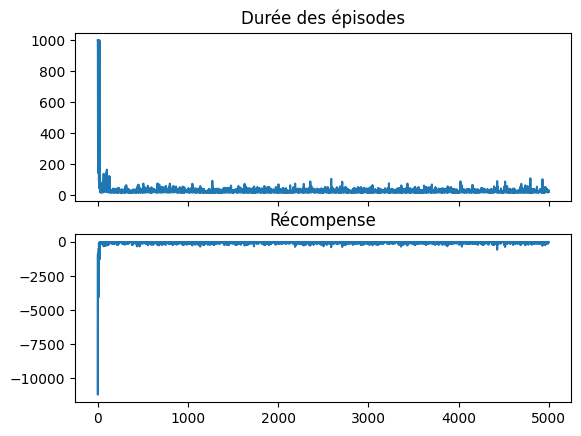

In [17]:
f ,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.set_title("Durée des épisodes")
ax1.plot(historique_duree_partie)

ax2.set_title("Récompense")
ax2.plot(historique_recompense)
plt.show()


### fin repère 1

## Vous devriez observer des courbes proches de celles ci dessous

![courbes](static/courbes.png)

### Question : quelle est l'action recommandée par notre politique en position 36 ? Est ce correct ? (1 pt)
Votre réponse :

In [18]:
Q[36]

array([ -44.6776    , -197.77635783,  -90.3343949 ,  -85.44701987])

### Question : quelle est l'action recommandée par notre politique en position 35 ? Est ce correct ? (1 pt)
Votre réponse :

In [19]:
Q[35]

array([ -6.35064935,  -2.4982699 ,  -1.        , -12.61563518])

### Affichons une simulation d'un épisode.
Note : si vous avez des difficultés à la version graphique, vous pouvez changer le mode render_mode="ansi" pour env_test et ajouter un print(env.render()) dans la boucle.<br>

### Note __il pourrait arriver que l'agent se bloque dans une colonne de la case gauche. Cela ne veut pas dire que votre algorithme n'a pas fonctionné mais nécessite plus d'entrainement.__

Solution : refaite un entrainement à partir de la section début repère 1

In [20]:
state=env_test.reset()[0]
done=False
while not done:
    action=policy(Q,0,state)
    state,_,done,truncated,_ = env_test.step(action)
    # print(env.render())
    time.sleep(0.5)

### Question : Le petit homme prend il le chemin le plus court et pourquoi ? (2.0 pt)
Votre réponse :

---

---

## Copier le code compris entre les balises **début repère 1** et **fin repère 1** ci dessous.
## Notre approche e-greedy n'est pas complétement satisfaisant.
## Nous allons faire une décroissance d'espilon progressive.
### Modifier le code pour faire évoluer epsilon de 0.90 à 0.05 selon un nombre d'éspisode que je vous laisse apprécier et relancer l'expérimentation. (3 pts)


### début repère 1

In [21]:
# votre code (1 pts)
Q=np.full((nombre_etat,nombre_action),0.0)
total_return=np.zeros((nombre_etat,nombre_action))
N=np.zeros((nombre_etat,nombre_action))

In [22]:
### écrivez le code manquant Mont Carlo First visit

In [23]:
# condition FIXES du test
np.random.seed(1)
num_iterations=NUM_ITERATION
num_step=NUM_STEP
epsilonMax=1.00
epsilonMin=0.05
nbPas=1500

# expérimentation
historique_duree_partie = []
historique_recompense = []
epsilon=epsilonMax
for i in range(num_iterations):
    
    # on génére un épisode
    episode = generate_episode(Q,epsilon,num_step)
    
    # on stocker les pairs s,a de l'épisode
    all_state_action_pairs = [(s, a) for (s,a,r) in episode]
    
    # on stocke les récompense
    rewards = [r for (s,a,r) in episode]

    # asjustement d'epsilon
    r=max((nbPas - i)/nbPas,0)
    epsilon = (epsilonMax-epsilonMin) * r + epsilonMin
    
    historique_duree_partie.append(len(episode))
    historique_recompense.append(np.sum(rewards))

    # en appliquant l'algorithme de Monte Carlo première visite, metter à jour total_return, N et par calcul Q
    # votre code (environ 6 lignes) ( 5pts)
    for t, (state, action, reward) in enumerate(episode):

        # First visit : on ne prend en compte que le premier passage s,a
        if not (state, action) in all_state_action_pairs[0:t]:
            
            # Calcul de G avec y = 1
            R = sum(rewards[t:])
            
            # Cumul G
            total_return[state,action] = total_return[state,action] + R
            
            # Comptage du nombre de passage
            N[(state, action)] += 1

            # Calcul de Q value (s,a) par la moyenne des G cumulés sur N
            Q[state,action] = total_return[state, action] / N[state, action]

---
### Affichons l'évolution de la durée des épisodes au fil de l'expérimentation et l'historique des récompenses

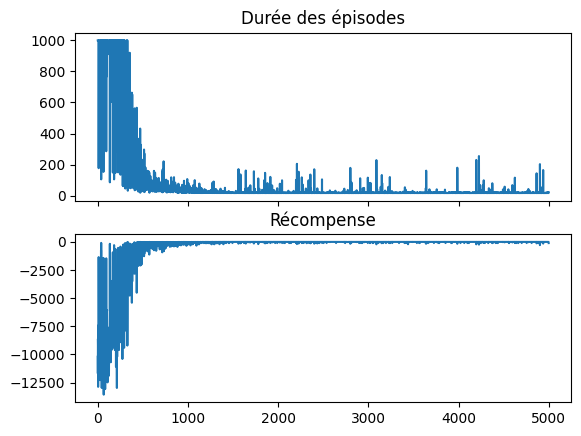

In [24]:
f ,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.set_title("Durée des épisodes")
ax1.plot(historique_duree_partie)

ax2.set_title("Récompense")
ax2.plot(historique_recompense)
plt.show()


Vous devriez obtenir des courbes prochent de celles ci (peut varier)

![courbes](static/courbes_decay.png)

### Question : pourquoi la partie gauche des courbes est elle plus épaisse qu'avec une valeur d'epsilon fixe ? (1 pt)

votre résponse


---